In [1]:
import vmodel
import os
import numpy as np
import h5py
import datetime
import scipy.spatial
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [2]:
double get_elongation(std::vector<particle> &a, std::vector<double> &dir, std::vector<int> &nodes){
    std::vector<double> p_dir(2, 0); // defines perpendicular direction
    double len = vec_length(dir);
    std::vector<double> cdir = dir;
    cdir[0] /= len;
    cdir[1] /= len;
    p_dir[0] = cdir[1];
    p_dir[1] = -cdir[0];
    double min, max, p_min, p_max, dist, p_dist;
    int ii = 0;
    min = p_min = std::numeric_limits<double>::max();
    max = p_max = std::numeric_limits<double>::lowest();
    dist = p_dist = 0;
    for(int i=0; i<nodes.size(); i++){
        ii = nodes[i];
        dist = a[ii].x[0] * cdir[0] + a[ii].x[1] * cdir[1];
        p_dist = a[ii].x[0] * p_dir[0] + a[ii].x[1] * p_dir[1];
        min = fmin(min, dist);
        max = fmax(max, dist);
        p_min = fmin(p_min, p_dist);
        p_max = fmax(p_max, p_dist);
    }
    double elongation = (max - min) / (p_max - p_min);
    return fabs(elongation);

SyntaxError: invalid syntax (2436151657.py, line 1)

In [2]:
def get_angle(x1,y1,x2,y2):
    myradians = math.atan2(y1-y2, x1-x2)
    mydegrees = math.degrees(myradians)
    return mydegrees

import matplotlib.pyplot as plt

In [3]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [4]:
class Vect:

   def __init__(self, a, b):
        self.a = a
        self.b = b

   def findClockwiseAngle(self, other):
       # using cross-product formula
       return -math.degrees(math.asin((self.a * other.b - self.b * other.a)/(self.length()*other.length())))
       # the dot-product formula, left here just for comparison (does not return angles in the desired range)
       # return math.degrees(math.acos((self.a * other.a + self.b * other.b)/(self.length()*other.length())))

   def length(self):
       return math.sqrt(self.a**2 + self.b**2)

In [5]:

mill = np.load("/home/lars/vmodel_output/longsim_preyvis_astr_noCol_mill_astr_visPrey.npy")
pol = np.load("/home/lars/vmodel_output/longsim_preyvis_astr_noCol_pol_astr_visPrey.npy")

steps = 10
reps = 20
paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(30,359,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
            

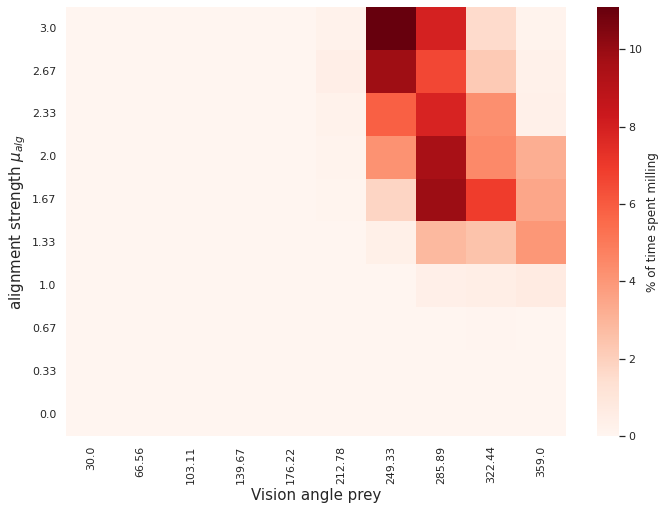

In [6]:


import seaborn as sns; sns.set_theme()
import pandas as pd

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, cbar_kws={'label': "% of time spent milling"},
                 cmap="Reds")

plt.tight_layout()
plt.gcf().set_size_inches(10,7.85)
plt.xlabel("Vision angle prey", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
name = "HM_mill_occ_visprey_noCol"
plt.savefig("/home/lars/vmodel_output/"+str(name)+".pdf",bbox_inches="tight")

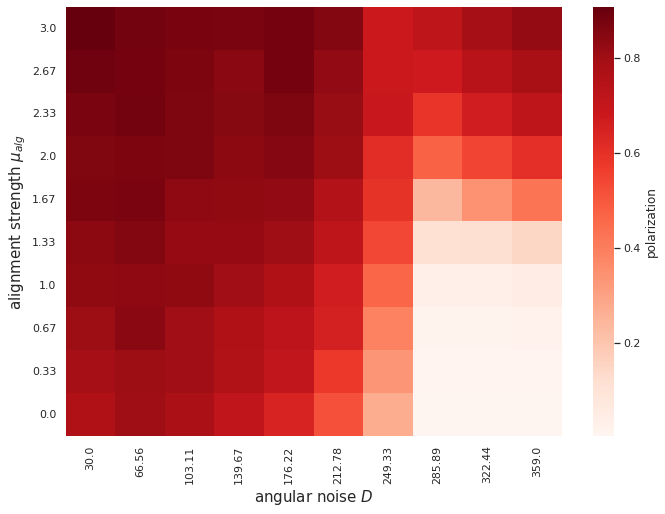

In [8]:
pol_time_full = np.mean(np.mean(pol,axis = 3), axis = 2)
df = pd.DataFrame(np.flip(pol_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df, cbar_kws={'label': "polarization"},
                 cmap="Reds")

plt.tight_layout()
plt.gcf().set_size_inches(10,7.85)
plt.xlabel("angular noise $D$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
name = "HM_pol_occ_dphi_noCol"
plt.savefig("/home/lars/vmodel_output/"+str(name)+".pdf",bbox_inches="tight")

In [20]:

mill = np.load("/home/lars/vmodel_output/longsim_reprad_astr_mill_astr_repRadPrey.npy")
pol = np.load("/home/lars/vmodel_output/longsim_reprad_astr_pol_astr_repRadPrey.npy")

steps = 10
reps = 20
paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0.7,3.7,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
            

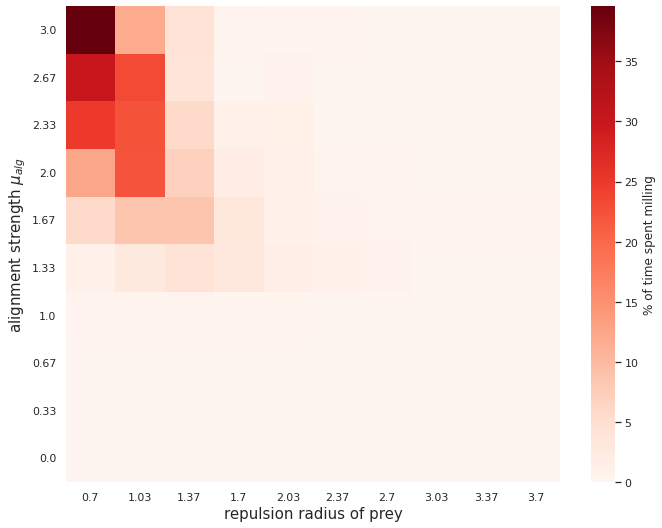

In [22]:


import seaborn as sns; sns.set_theme()
import pandas as pd
import matplotlib.pyplot as plt

name = "HM_mill_occ_col_radius"

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, cbar_kws={'label': "% of time spent milling"},
                 cmap="Reds")

plt.tight_layout()
plt.gcf().set_size_inches(10,7.85)
plt.xlabel("repulsion radius of prey", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.savefig("/home/lars/vmodel_output/"+str(name)+".pdf",bbox_inches="tight")

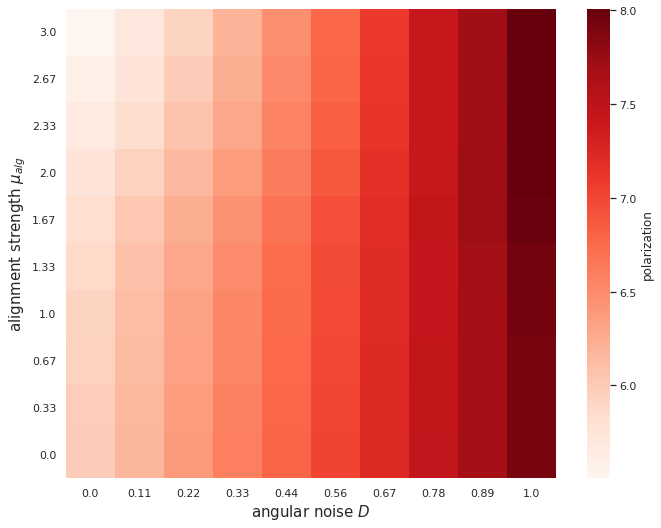

In [32]:
pol_time_full = np.mean(np.mean(pol,axis = 3), axis = 2)

df = pd.DataFrame(np.flip(pol_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df, cbar_kws={'label': "polarization"},
                 cmap="Reds")

plt.tight_layout()
plt.gcf().set_size_inches(10,7.85)
plt.xlabel("angular noise $D$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15

name = "HM_pol_occ_NOcol_dphi"
plt.savefig("/home/lars/vmodel_output/"+str(name)+".pdf",bbox_inches="tight")

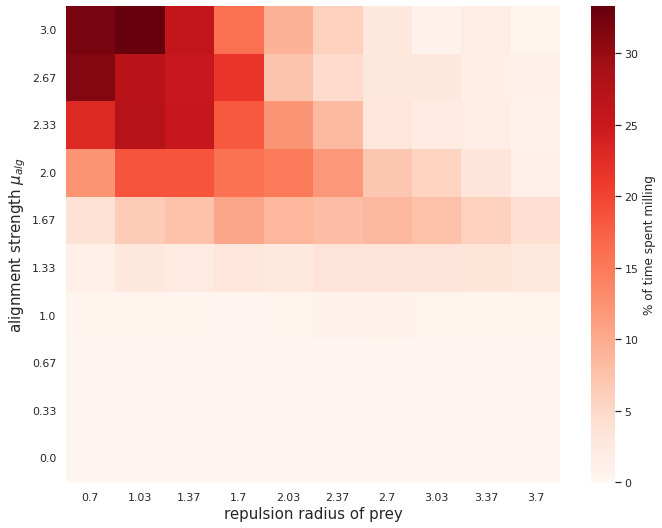

In [12]:

mill = np.load("/home/lars/vmodel_output/longsim_finer_reprad_astr_NO-COL_mill_astr_repRadPrey.npy")
pol = np.load("/home/lars/vmodel_output/longsim_finer_reprad_astr_NO-COL_pol_astr_repRadPrey.npy")

steps = 10
reps = 20
paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0.7,3.7,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
name = "HM_mill_occ_NOcol_radius_finer"


df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, cbar_kws={'label': "% of time spent milling"},
                 cmap="Reds")

plt.tight_layout()
plt.gcf().set_size_inches(10,7.85)
plt.xlabel("repulsion radius of prey", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.savefig("/home/lars/vmodel_output/"+str(name)+".pdf",bbox_inches="tight")

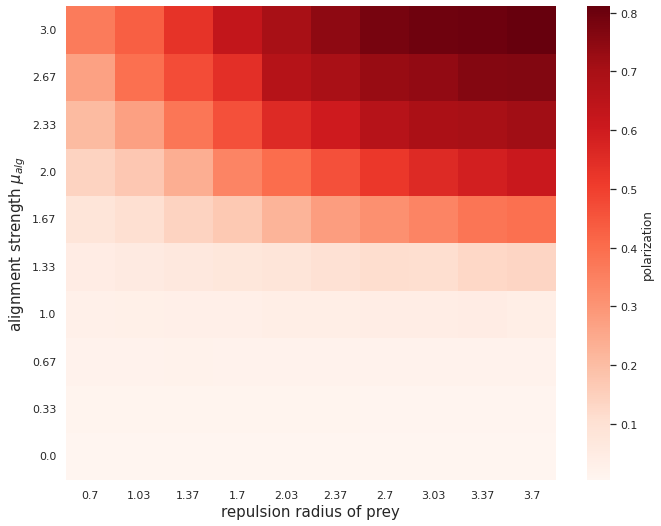

In [13]:
pol_time_full = np.mean(np.mean(pol,axis = 3), axis = 2)

df = pd.DataFrame(np.flip(pol_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]

name = "HM_pol_occ_NOcol_radius_finer"
#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df, cbar_kws={'label': "polarization"},
                 cmap="Reds")

plt.tight_layout()
plt.gcf().set_size_inches(10,7.85)
plt.xlabel("repulsion radius of prey", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.savefig("/home/lars/vmodel_output/"+str(name)+".pdf",bbox_inches="tight")

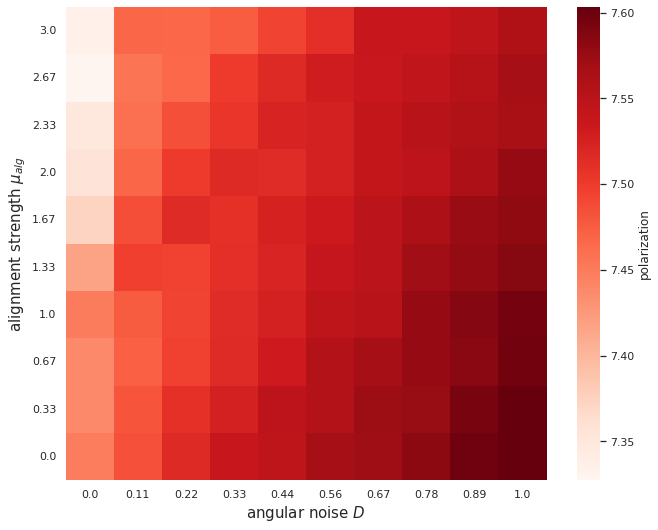

In [29]:
pol = np.load("/home/lars/vmodel_output/longsim_astr_dphi_NN_astr_dphi.npy")/18800/100

NN = np.mean(pol, axis = 3)
NN = np.mean(NN, axis = 2)

df = pd.DataFrame(np.flip(NN, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df, cbar_kws={'label': "polarization"},
                 cmap="Reds")

plt.tight_layout()
plt.gcf().set_size_inches(10,7.85)
plt.xlabel("angular noise $D$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15

name = "HM_NN_occ_col_dphi"
plt.savefig("/home/lars/vmodel_output/"+str(name)+".pdf",bbox_inches="tight")

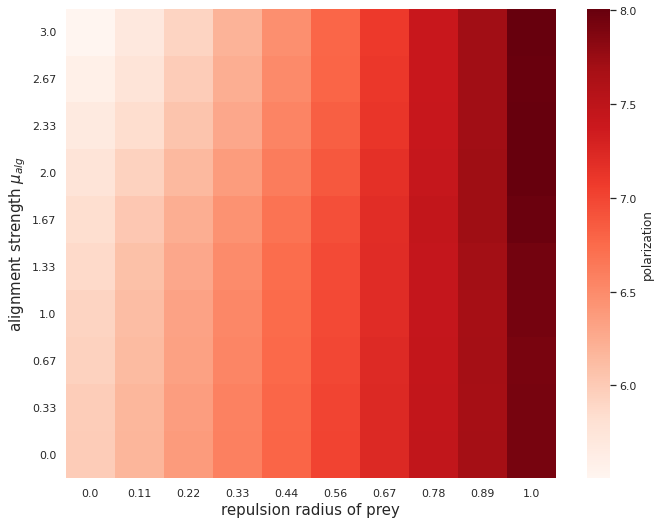

In [31]:
pol = np.load("/home/lars/vmodel_output/finer_longsim_reprad_astr_NN_astr_repRadPrey.npy")/18800/100

NN = np.mean(pol, axis = 3)
NN = np.mean(NN, axis = 2)

df = pd.DataFrame(np.flip(NN, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df, cbar_kws={'label': "polarization"},
                 cmap="Reds")

plt.tight_layout()
plt.gcf().set_size_inches(10,7.85)
plt.xlabel("repulsion radius of prey", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15

name = "HM_NN_occ_col_radius"
plt.savefig("/home/lars/vmodel_output/"+str(name)+".pdf",bbox_inches="tight")

In [28]:
np.sum(pol)

282784801.5400004